In [89]:
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# import train-test split 
from sklearn.model_selection import train_test_split

# import various functions from statsmodels
import statsmodels
import statsmodels.api as sm

# import 'stats'
from scipy import stats

# 'metrics' from sklearn is used for evaluating the model performance
from sklearn.metrics import mean_squared_error,mean_absolute_error

# import function to perform linear regression
from sklearn.linear_model import LinearRegression,SGDRegressor,Ridge,Lasso,ElasticNet,LogisticRegression

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler

# import function to perform GridSearchCV
from sklearn.model_selection import GridSearchCV

from mlxtend.feature_selection import SequentialFeatureSelector as sfs

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay, precision_score,  recall_score, f1_score, classification_report, roc_curve,  auc, precision_recall_curve,  average_precision_score

In [2]:
data=pd.read_csv("healthcare-dataset-stroke-data.csv")

# 1. Read the dataset and view the first 10 rows of it.

In [3]:
data.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


# 2. Check the shape/dimension of the dataset


In [4]:
data.shape

(5110, 12)

# 3. Check for the missing values.Display number of missing values per column.

In [5]:
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [6]:
# here we can observe that bmi feature has 201 missing value are  present 

# 4. Investigate and predict the missing BMI Value.

<AxesSubplot:xlabel='bmi'>

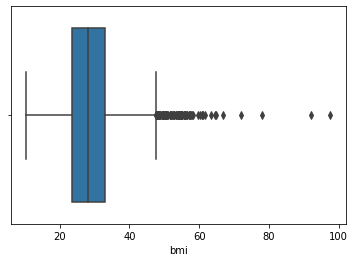

In [7]:
sns.boxplot(data.bmi)

In [8]:
null_counts = data.isnull().sum()/len(data)
null_counts

id                   0.000000
gender               0.000000
age                  0.000000
hypertension         0.000000
heart_disease        0.000000
ever_married         0.000000
work_type            0.000000
Residence_type       0.000000
avg_glucose_level    0.000000
bmi                  0.039335
smoking_status       0.000000
stroke               0.000000
dtype: float64

In [9]:
data.bmi.median()

28.1

In [10]:
data['bmi']=data['bmi'].fillna(data.bmi.median())

In [11]:
data.bmi.isnull().sum()

0

# 5. Check the datatype, number of non null values and name of each variable in the dataset.

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


# 6. Check the descriptive statistics of the dataset.

In [13]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.862035,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.699562,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [14]:
data.describe(include='object')

,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


# 7. Visualize the proportion of Stroke samples in the dataset.

<AxesSubplot:>

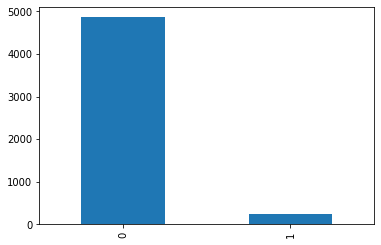

In [15]:
data.stroke.value_counts().plot(kind='bar')

<AxesSubplot:xlabel='stroke', ylabel='count'>

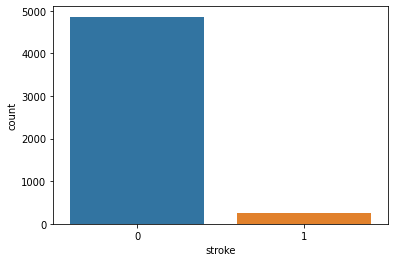

In [16]:
sns.countplot(data.stroke)

# 8. Visualize the Distribution of Male and Female Ages. Write the Observation.

In [17]:
data['gender']=data['gender'].map({'Male':0,'Female':1,'Other':2})

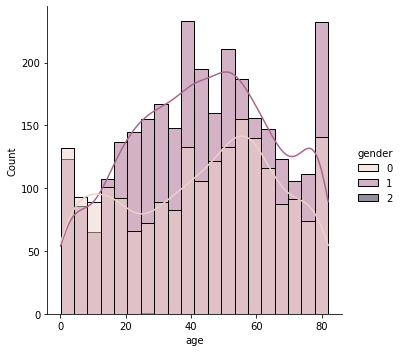

In [18]:
sns.displot(data=data, x='age', hue='gender',kde=True)

# 10.Visualize the stroke sample based on
a) BMI and Glucose Level
b) BMI and Age


<AxesSubplot:xlabel='bmi', ylabel='avg_glucose_level'>

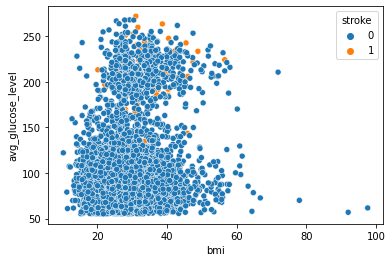

In [19]:
# a) BMI and Glucose Level 
sns.scatterplot(data.bmi,data.avg_glucose_level,hue=data.stroke)

<AxesSubplot:xlabel='bmi', ylabel='age'>

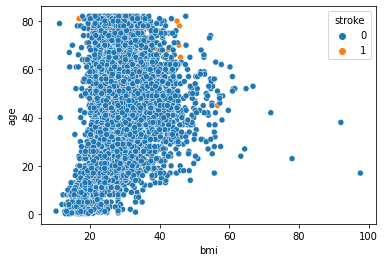

In [20]:
# b) BMI and Age
sns.scatterplot(data.bmi,data.age,hue=data.stroke)

# 11. Using the pie chart visualizes the proportion of different smoking categories among the stroke population

In [21]:
count=data.smoking_status.value_counts()
count

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

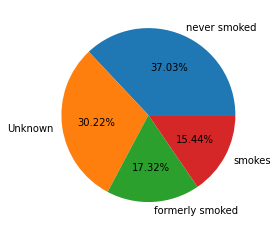

In [22]:
plt.pie(count,labels=['never smoked','Unknown','formerly smoked','smokes'],autopct='%.2f%%')
plt.show()

In [23]:
12

12

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   int64  
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 479.2+ KB


In [25]:
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,0,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,1,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,31112,0,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,1,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,1,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,1,80.0,1,0,Yes,Private,Urban,83.75,28.1,never smoked,0
5106,44873,1,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,1,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,0,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [27]:
import pandas as pd
import scipy.stats as stats

# Perform chi-square test for categorical variables
def chi_square_test(variable, target):
    contingency_table = pd.crosstab(df[variable], df[target])
    chi2, p_value, _, _ = stats.chi2_contingency(contingency_table)
    print("Variable:", variable)
    print("Chi-square value:", chi2)
    print("P-value:", p_value)
    if p_value < 0.05:  # Set the significance level (alpha) here
        print("The variable", variable, "is significantly associated with", target)
    else:
        print("The variable", variable, "is not significantly associated with", target)
    print("\n")

# Perform t-test for continuous variables
def t_test(variable, target):
    group1 = df[df[target] == 0][variable]
    group2 = df[df[target] == 1][variable]
    t_stat, p_value = stats.ttest_ind(group1, group2)
    print("Variable:", variable)
    print("T-statistic value:", t_stat)
    print("P-value:", p_value)
    if p_value < 0.05:  # Set the significance level (alpha) here
        print("The variable", variable, "is significantly associated with", target)
    else:
        print("The variable", variable, "is not significantly associated with", target)
    print("\n")

# Specify the target variable (stroke)
target_variable = 'stroke'

# Perform hypothesis testing for each variable
# categorical_variables = ['residency_type']
continuous_variables = ['age','gender', 'hypertension', 'heart_disease', 'ever_married', 'smoking_status', 'avg_glucose_level', 'bmi']

# for variable in categorical_variables:
#     chi_square_test(variable, target_variable)

for variable in continuous_variables:
    t_test(variable, target_variable)


NameError: name 'df' is not defined

# 13. Drop the unnecessary columns.

In [28]:
health_data=data.drop(data[['id','work_type']],axis=1)


In [29]:
health_data

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,67.0,0,1,Yes,Urban,228.69,36.6,formerly smoked,1
1,1,61.0,0,0,Yes,Rural,202.21,28.1,never smoked,1
2,0,80.0,0,1,Yes,Rural,105.92,32.5,never smoked,1
3,1,49.0,0,0,Yes,Urban,171.23,34.4,smokes,1
4,1,79.0,1,0,Yes,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...
5105,1,80.0,1,0,Yes,Urban,83.75,28.1,never smoked,0
5106,1,81.0,0,0,Yes,Urban,125.20,40.0,never smoked,0
5107,1,35.0,0,0,Yes,Rural,82.99,30.6,never smoked,0
5108,0,51.0,0,0,Yes,Rural,166.29,25.6,formerly smoked,0


# 14. Write the code to replace following categories columns in integer format as follow –

# a) work_type('Private':0,'Selfemployed':1,'Govt_job':2,'children':1,'Never_worked':-2)

In [30]:
data['work_type'].value_counts()

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

In [31]:
data['work_type']=data['work_type'].map({'Private':0,'Self-employed':1,'children':1,'Govt_job':2,'Never_worked':-2})

# b) ever_married('Yes': 1, 'No': 0)

In [32]:
data.ever_married=data['ever_married'].map({'Yes':1,'No':0})

# c) smoking_status('never smoked':0,'Unknown':1,'formerly smoked':2,'smokes':-1)

In [33]:
data['smoking_status']=data['smoking_status'].map({'never smoked':0,'Unknown':1,'formerly smoked':2,'smokes':-1})

In [34]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,0,67.0,0,1,1,0,Urban,228.69,36.6,2,1
1,51676,1,61.0,0,0,1,1,Rural,202.21,28.1,0,1
2,31112,0,80.0,0,1,1,0,Rural,105.92,32.5,0,1
3,60182,1,49.0,0,0,1,0,Urban,171.23,34.4,-1,1
4,1665,1,79.0,1,0,1,1,Rural,174.12,24.0,0,1


# 15. Check the distribution of 'bmi' and 'stroke' columns in the dataset

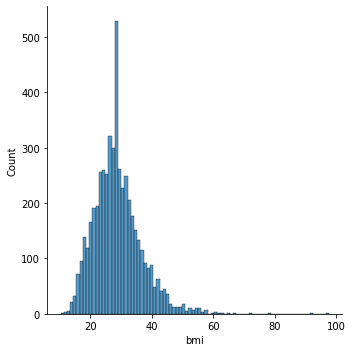

In [35]:
sns.displot(data=data, x='bmi')

<AxesSubplot:xlabel='stroke', ylabel='Density'>

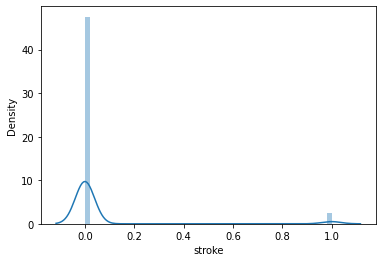

In [36]:
sns.distplot(data.stroke)

# 16. List down columns that are highly skewed.

In [37]:
data.skew()

id                  -0.019913
gender              -0.345664
age                 -0.137059
hypertension         2.715392
heart_disease        3.947244
ever_married        -0.657745
work_type            0.679586
avg_glucose_level    1.572284
bmi                  1.088187
smoking_status       0.082279
stroke               4.193284
dtype: float64

here we can observe that hypertension,heart_disese,avg_glucose_level and stroke are highly positve skewed

# 17. List down the columns that are highly kurtosis

In [38]:
data.kurt()

id                   -1.212368
gender               -1.868001
age                  -0.991010
hypertension          5.375456
heart_disease        13.586052
ever_married         -1.567985
work_type            -0.085432
avg_glucose_level     1.680479
bmi                   3.635306
smoking_status       -0.922415
stroke               15.589736
dtype: float64

# 18. Find the distribution of all variables with respect to the outcome 'stroke' variable.

In [39]:
data.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

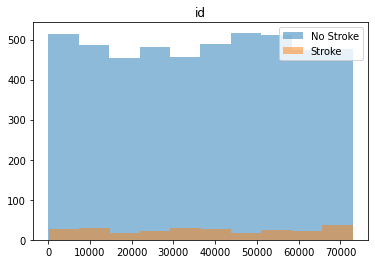

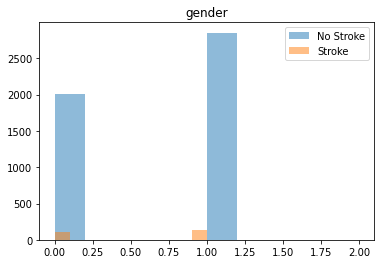

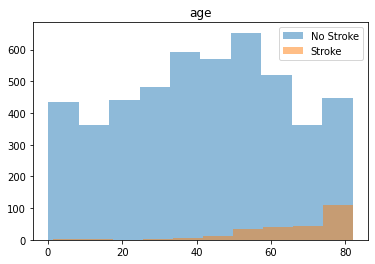

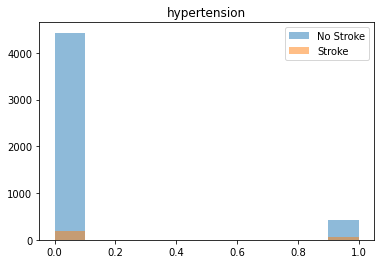

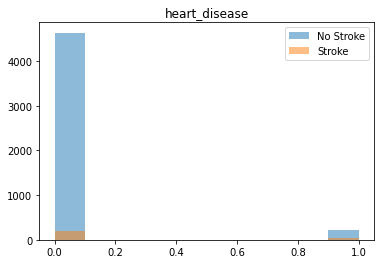

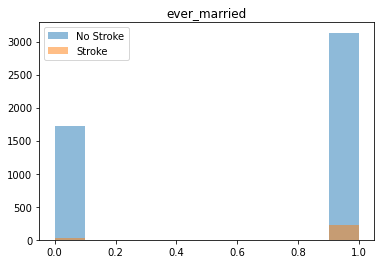

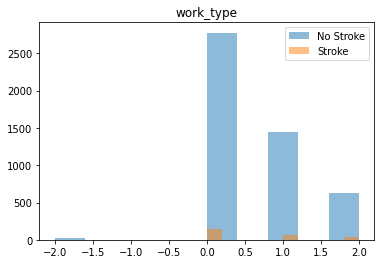

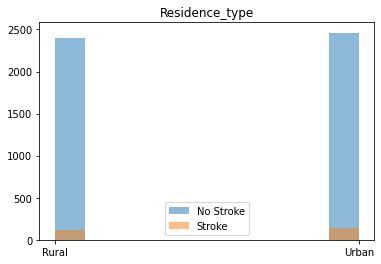

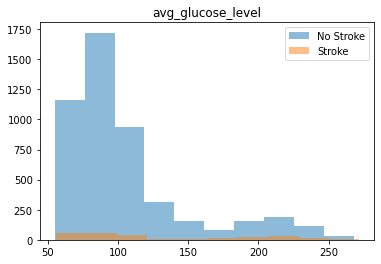

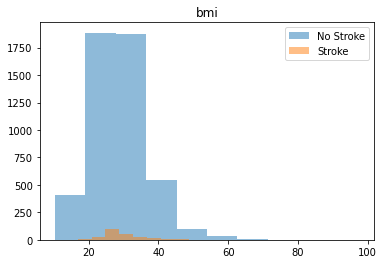

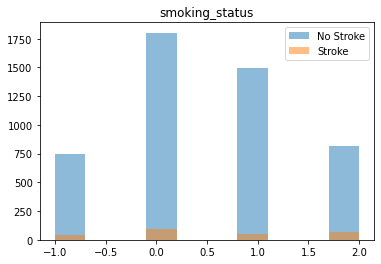

In [40]:
stroke_groups = data.groupby('stroke')

# Plot the distribution of each variable for each group
for col in data.columns:
    if col != 'stroke':
        fig, ax = plt.subplots()
        ax.hist(stroke_groups.get_group(0)[col], alpha=0.5, label='No Stroke')
        ax.hist(stroke_groups.get_group(1)[col], alpha=0.5, label='Stroke')
        ax.set_title(col)
        ax.legend()
        plt.show()


# 19. Plot the heatmap for correlation matrix for the given dataset. Write the observation

In [41]:
df=data.corr()

<AxesSubplot:>

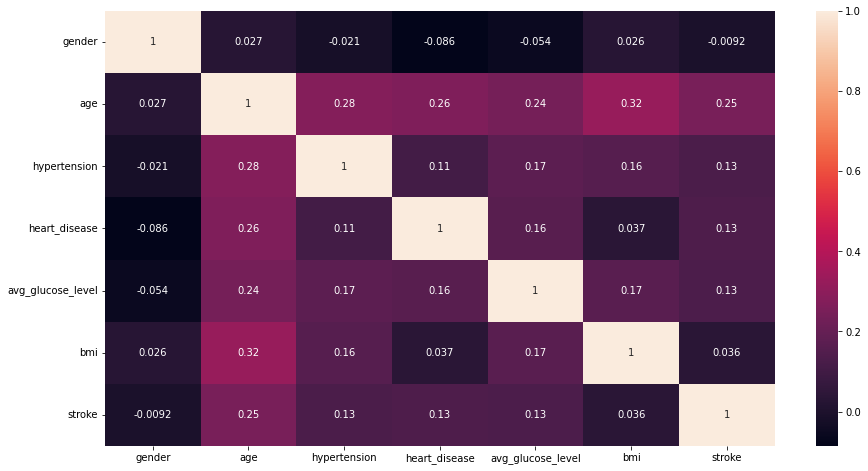

In [42]:
plt.figure(figsize=(15,8))
sns.heatmap(health_data.corr(),annot=True)

# 20. Split the dataset randomly into train and test dataset. Use a train ratio of 70:30 ratio.

In [43]:
health_data['smoking_status']=health_data['smoking_status'].map({'never smoked':0,'Unknown':1,'formerly smoked':2,'smokes':-1})
health_data['Residence_type']=health_data['Residence_type'].map({'Urban':0,'Rural':1})
health_data.ever_married=health_data['ever_married'].map({'Yes':1,'No':0})

In [44]:
X=health_data.drop('stroke',axis=1)
y=health_data['stroke']

In [54]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=10)

In [55]:
X_train.shape

(6805, 9)

In [56]:
X_train

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status
4421,1,18.000000,0,0,0,0,99.010000,25.500000,2
4955,0,38.000000,0,0,1,0,215.690000,38.600000,2
1758,0,1.720000,0,0,0,0,90.460000,22.500000,1
57,0,78.000000,0,0,1,0,237.750000,28.100000,2
5276,0,80.000000,0,0,1,0,251.514883,30.166040,1
...,...,...,...,...,...,...,...,...,...
9372,0,77.529966,0,0,1,0,199.702379,27.467417,1
7291,0,80.317196,0,0,1,0,91.901886,30.648916,0
1344,0,47.000000,0,0,1,1,86.370000,39.200000,-1
7293,0,78.778624,0,0,1,0,73.303365,28.333587,0


# 21. Check the dataset is balanced or imbalanced. If it is highly investigated, a different approach to balanced the dataset by using the correct technique

In [57]:
data.groupby(['stroke']).count()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
stroke,,,,,,,,,,,
0,4861,4861,4861,4861,4861,4861,4861,4861,4861,4861,4861
1,249,249,249,249,249,249,249,249,249,249,249


<AxesSubplot:xlabel='stroke', ylabel='count'>

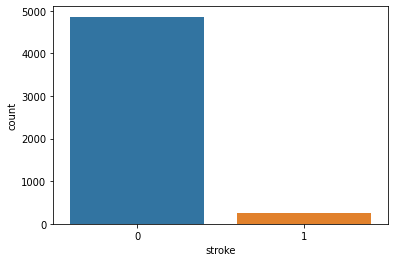

In [58]:
sns.countplot(data.stroke)

In [59]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X, y = smote.fit_resample(X, y)

df = pd.concat([pd.DataFrame(X), pd.DataFrame(y)], axis=1)

In [60]:
df['stroke'].value_counts()

1    4861
0    4861
Name: stroke, dtype: int64

<AxesSubplot:xlabel='stroke', ylabel='count'>

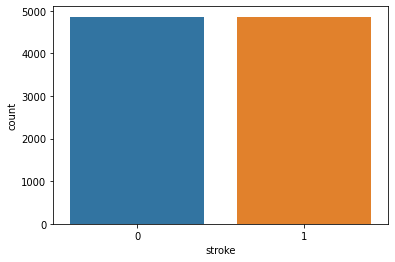

In [61]:
sns.countplot(df.stroke)

# 22. Model Selection/hyperparameter tuning
- Try different models and fine tune their performance until you get the desired level of performance on the given dataset.
- Model Evaluation
- Evaluate the models using appropriate evaluation metrics.

In [62]:
model=LogisticRegression()
model.fit(X_train,y_train)

y_pred=model.predict(X_test)
t=list(X_train.columns)
coef_df = pd.DataFrame(model.coef_, columns= t)
coef_df['intercept'] = model.intercept_
print(coef_df)

     gender       age  hypertension  heart_disease  ever_married  \
0 -1.240875  0.092387     -1.101779      -1.748184     -0.959213   

   Residence_type  avg_glucose_level      bmi  smoking_status  intercept  
0       -0.926413           0.005387 -0.01081       -0.281473  -3.627693  


In [63]:
from sklearn import metrics
model_score = model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_pred))


0.813507027768255
[[1176  299]
 [ 245 1197]]


In [64]:
from sklearn import preprocessing

# scale all the columns of the mpg_df. This will produce a numpy array
#pima_df_scaled = preprocessing.scale(pima_df[0:7])
X_train_scaled = preprocessing.scale(X_train)
X_test_scaled = preprocessing.scale(X_test)

In [65]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)
y_predict = model.predict(X_test_scaled)
model_score = model.score(X_test_scaled, y_test)
print(model_score)


# IMPORTANT: first argument is true values, second argument is predicted values
# this produces a 2x2 numpy array (matrix)
print(metrics.confusion_matrix(y_test, y_predict))

0.813507027768255
[[1161  314]
 [ 230 1212]]


# Model building

In [66]:
score_card = pd.DataFrame(columns=['Probability Cutoff', 'AUC Score', 'Precision Score', 'Recall Score',
                                       'Accuracy Score', 'Kappa Score', 'f1-score'])
def update_score_card(model, cutoff):
    y_pred_prob = model.predict(X_test)
    y_pred = [ 0 if x < cutoff else 1 for x in y_pred_prob]
    global score_card
    score_card = score_card.append({'Probability Cutoff': cutoff,
                                    'AUC Score' : metrics.roc_auc_score(y_test, y_pred),
                                    'Precision Score': metrics.precision_score(y_test, y_pred),
                                    'Recall Score': metrics.recall_score(y_test, y_pred),
                                    'Accuracy Score': metrics.accuracy_score(y_test, y_pred),
                                    'Kappa Score':metrics.cohen_kappa_score(y_test, y_pred),
                                    'f1-score': metrics.f1_score(y_test, y_pred)}, 
                                    ignore_index = True)

In [67]:
def get_test_report(model, test_data):
    test_pred = model.predict(test_data)
    return(classification_report(y_test, test_pred))

In [68]:
def get_train_report(model, train_data):
    train_pred = model.predict(train_data)
    return(classification_report(y_train, train_pred))

In [69]:
def plot_confusion_matrix(model, test_data):
    y_pred = model.predict(test_data)
    cm = confusion_matrix(y_test, y_pred)
    conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
    sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
                linewidths = 0.1, annot_kws = {'size':25})
    plt.xticks(fontsize = 20)
    plt.yticks(fontsize = 20)
    plt.show()

In [90]:
def plot_roc(model, test_data):
    y_pred_prob = model.predict_proba(test_data)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    plt.plot(fpr, tpr)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.plot([0, 1], [0, 1],'r--')
    plt.title('ROC curve for Cancer Prediction Classifier', fontsize = 15)
    plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
    plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
    plt.text(x = 0.02, y = 0.9, s = ('AUC Score:',round(roc_auc_score(y_test, y_pred_prob),4)))
    plt.grid(True)

In [71]:
X_scaler = StandardScaler()
num_scaled = X_scaler.fit_transform(health_data)
health_data_scaled = pd.DataFrame(num_scaled, columns = health_data.columns)

In [150]:
health_data_scaled

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,-1.189511,1.051434,-0.328602,4.185032,0.723884,-0.984080,2.706375,1.005086,1.582804,4.418381
1,0.839328,0.786070,-0.328602,-0.238947,0.723884,1.016178,2.121559,-0.098981,-0.519374,4.418381
2,-1.189511,1.626390,-0.328602,4.185032,0.723884,1.016178,-0.005028,0.472536,-0.519374,4.418381
3,0.839328,0.255342,-0.328602,-0.238947,0.723884,-0.984080,1.437358,0.719327,-1.570462,4.418381
4,0.839328,1.582163,3.043196,-0.238947,0.723884,1.016178,1.501184,-0.631531,-0.519374,4.418381
...,...,...,...,...,...,...,...,...,...,...
5105,0.839328,1.626390,3.043196,-0.238947,0.723884,-0.984080,-0.494658,-0.098981,-0.519374,-0.226327
5106,0.839328,1.670617,-0.328602,-0.238947,0.723884,-0.984080,0.420775,1.446713,-0.519374,-0.226327
5107,0.839328,-0.363842,-0.328602,-0.238947,0.723884,1.016178,-0.511443,0.225745,-0.519374,-0.226327
5108,-1.189511,0.343796,-0.328602,-0.238947,0.723884,1.016178,1.328257,-0.423706,1.582804,-0.226327


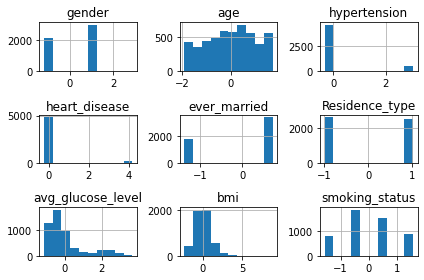

Skewness:


gender              -0.345664
age                 -0.137059
hypertension         2.715392
heart_disease        3.947244
ever_married        -0.657745
Residence_type       0.032107
avg_glucose_level    1.572284
bmi                  1.088187
smoking_status       0.082279
dtype: float64

In [72]:
health_data_scaled.drop('stroke',axis=1).hist()
plt.tight_layout()
plt.show()  
print('Skewness:')
health_data_scaled.drop('stroke',axis=1).skew()

In [73]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=10)

### Logit Regression

In [74]:
model = sm.Logit(y_train, X_train).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.438793
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                 stroke   No. Observations:                 6805
Model:                          Logit   Df Residuals:                     6796
Method:                           MLE   Df Model:                            8
Date:                Fri, 19 May 2023   Pseudo R-squ.:                  0.3669
Time:                        18:20:09   Log-Likelihood:                -2986.0
converged:                       True   LL-Null:                       -4716.8
Covariance Type:            nonrobust   LLR p-value:                     0.000
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
gender               -1.3467      0.065    -20.708      0.000      -1.474      -1.219
age     

In [75]:
y_pred_p = logreg.predict(X_test)
y_pred_p.head()

2167    0.097952
9191    0.756450
2790    0.101718
1733    0.053281
2318    0.141331
dtype: float64

In [76]:
y_pred = [ 0 if x < 0.5 else 1 for x in y_pred_p]
y_pred[0:5]

[0, 1, 0, 0, 0]

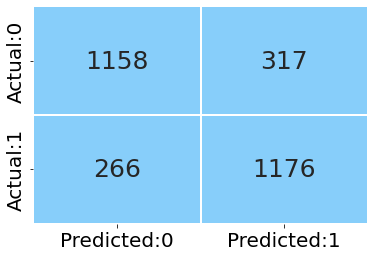

In [79]:
cm = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

In [80]:
TN = cm[0,0]
TP = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [81]:
acc_table = classification_report(y_test, y_pred)
print(acc_table)

              precision    recall  f1-score   support

           0       0.81      0.79      0.80      1475
           1       0.79      0.82      0.80      1442

    accuracy                           0.80      2917
   macro avg       0.80      0.80      0.80      2917
weighted avg       0.80      0.80      0.80      2917



In [82]:
cutoff = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
for value in cutoff:
    update_score_card(logreg, value)

In [83]:
print('Score Card for Logistic regression:')
score_card = score_card.sort_values('Probability Cutoff').reset_index(drop = True) 
score_card.style.highlight_max(color = 'lightblue', subset = ['AUC Score', 'Accuracy Score', 'Kappa Score', 'f1-score'])

Score Card for Logistic regression:


,Probability Cutoff,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,0.100000,0.649267,0.584367,0.979889,0.645526,0.296290,0.732124
1,0.200000,0.723139,0.648931,0.947295,0.720603,0.443995,0.770228
2,0.300000,0.767166,0.702026,0.913315,0.765513,0.532539,0.793852
3,0.400000,0.791045,0.748801,0.866158,0.790195,0.581072,0.803215
4,0.500000,0.800309,0.787676,0.815534,0.800137,0.600381,0.801363
5,0.600000,0.783045,0.815564,0.726768,0.783682,0.566781,0.768610
6,0.700000,0.764679,0.859168,0.630374,0.766198,0.530939,0.727200
7,0.800000,0.713235,0.888466,0.486130,0.715804,0.428641,0.628418
8,0.900000,0.633443,0.917391,0.292649,0.637299,0.268935,0.443743


### KNN Classification

In [84]:
knn_classification = KNeighborsClassifier(n_neighbors = 3)
knn_model = knn_classification.fit(X_train, y_train)

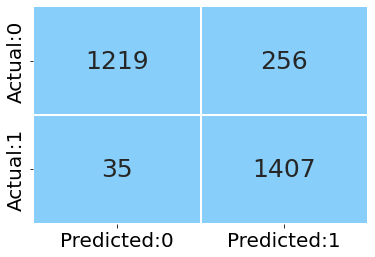

In [85]:
plot_confusion_matrix(knn_model, test_data = X_test)

In [86]:
test_report = get_test_report(knn_model, test_data = X_test)
print(test_report)

              precision    recall  f1-score   support

           0       0.97      0.83      0.89      1475
           1       0.85      0.98      0.91      1442

    accuracy                           0.90      2917
   macro avg       0.91      0.90      0.90      2917
weighted avg       0.91      0.90      0.90      2917



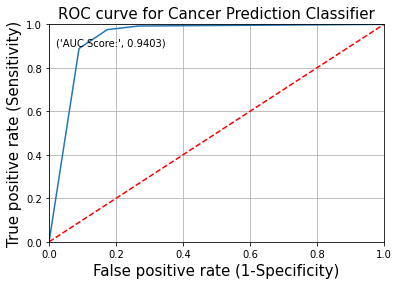

In [91]:
plot_roc(knn_model, test_data = X_test)

### KNN Classification GridSearchCV 

In [92]:
tuned_paramaters = {'n_neighbors': np.arange(1, 25, 2),
                   'metric': ['hamming','euclidean','manhattan','Chebyshev']}
 
# instantiate the 'KNeighborsClassifier' 
knn_classification = KNeighborsClassifier()
knn_grid = GridSearchCV(estimator = knn_classification, 
                        param_grid = tuned_paramaters, 
                        cv = 5, 
                        scoring = 'accuracy')
knn_grid.fit(X_train, y_train)
print('Best parameters for KNN Classifier: ', knn_grid.best_params_, '\n')

Best parameters for KNN Classifier:  {'metric': 'manhattan', 'n_neighbors': 1} 



In [109]:
knn_classification = KNeighborsClassifier(n_neighbors = 1,metric= 'manhattan')
knn_model_hp = knn_classification.fit(X_train, y_train)

In [110]:
test_report = get_test_report(knn_model_hp, test_data = X_test)
print(test_report)

              precision    recall  f1-score   support

           0       0.98      0.85      0.91      1475
           1       0.87      0.98      0.92      1442

    accuracy                           0.92      2917
   macro avg       0.92      0.92      0.92      2917
weighted avg       0.92      0.92      0.92      2917



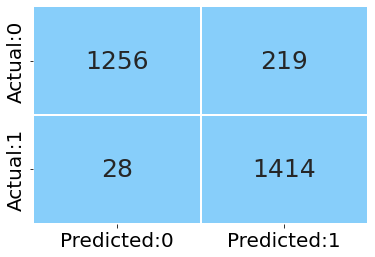

In [111]:
plot_confusion_matrix(knn_model_hp, test_data = X_test)

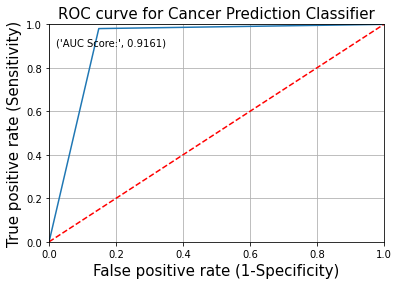

In [112]:
plot_roc(knn_model_hp, test_data = X_test)

### GaussianNB 

In [113]:
gnb = GaussianNB()
gnb_model = gnb.fit(X_train, y_train)

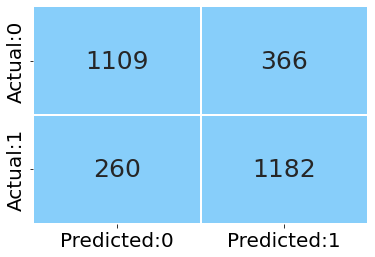

In [114]:
plot_confusion_matrix(gnb_model, test_data=X_test)

In [115]:
test_report = get_test_report(gnb_model, test_data=X_test)
print(test_report)

              precision    recall  f1-score   support

           0       0.81      0.75      0.78      1475
           1       0.76      0.82      0.79      1442

    accuracy                           0.79      2917
   macro avg       0.79      0.79      0.79      2917
weighted avg       0.79      0.79      0.79      2917



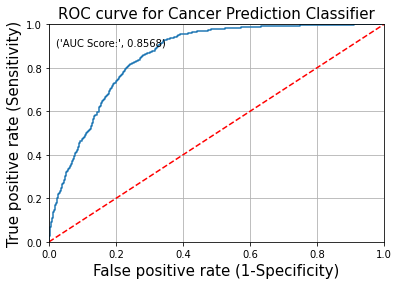

In [116]:
plot_roc(gnb_model, test_data=X_test)

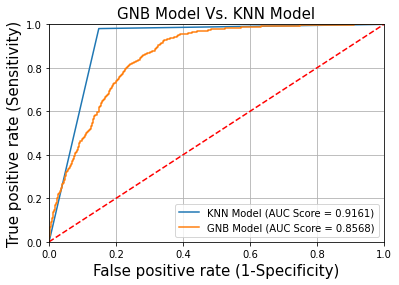

In [117]:
y_pred_prob_knn = knn_grid.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_knn)
auc_score_knn = roc_auc_score(y_test, y_pred_prob_knn)
plt.plot(fpr, tpr, label='KNN Model (AUC Score = %0.4f)' % auc_score_knn)
y_pred_prob_gnb = gnb_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_gnb)
auc_score_gnb = roc_auc_score(y_test, y_pred_prob_gnb)
plt.plot(fpr, tpr, label='GNB Model (AUC Score = %0.4f)' % auc_score_gnb)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1],'r--')
plt.title('GNB Model Vs. KNN Model', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
plt.legend(loc = 'lower right')
plt.grid(True)

### Decision Tree Classification

In [118]:
decision_tree_classification = DecisionTreeClassifier(criterion = 'entropy', random_state = 10)
decision_tree = decision_tree_classification.fit(X_train, y_train)

In [119]:
train_report = get_train_report(decision_tree, train_data=X_train)
print(train_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3386
           1       1.00      1.00      1.00      3419

    accuracy                           1.00      6805
   macro avg       1.00      1.00      1.00      6805
weighted avg       1.00      1.00      1.00      6805



In [120]:
test_report = get_test_report(decision_tree, test_data=X_test)
print(test_report)

              precision    recall  f1-score   support

           0       0.91      0.90      0.90      1475
           1       0.90      0.90      0.90      1442

    accuracy                           0.90      2917
   macro avg       0.90      0.90      0.90      2917
weighted avg       0.90      0.90      0.90      2917



Interpretation: From the above output, we can see that there is a difference between the train and test accuracy; thus, we can conclude that the decision tree is over-fitted on the train data.

if we tune the hyperparameters in the decision tree, it helps to avoid the over-fitting of the tree.

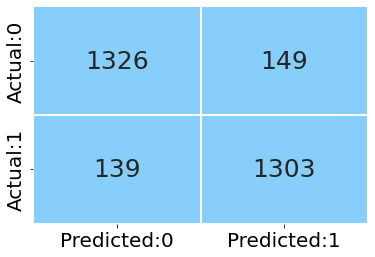

In [121]:
plot_confusion_matrix(decision_tree, test_data = X_test)

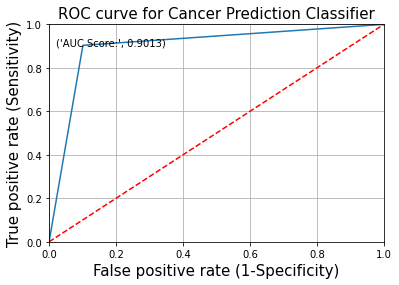

In [122]:
plot_roc(decision_tree, test_data=X_test)

In [123]:
dt_model = DecisionTreeClassifier(criterion = 'gini',
                                  max_depth = 5,
                                  min_samples_split = 4,
                                  max_leaf_nodes = 6,
                                  random_state = 10)
decision_tree = dt_model.fit(X_train, y_train)
train_report = get_train_report(decision_tree, train_data=X_train)
print('Train data:\n', train_report)
test_report = get_test_report(decision_tree, test_data=X_test)
print('Test data:\n', test_report)

Train data:
               precision    recall  f1-score   support

           0       0.81      0.80      0.80      3386
           1       0.80      0.81      0.81      3419

    accuracy                           0.81      6805
   macro avg       0.81      0.81      0.81      6805
weighted avg       0.81      0.81      0.81      6805

Test data:
               precision    recall  f1-score   support

           0       0.79      0.80      0.79      1475
           1       0.79      0.78      0.78      1442

    accuracy                           0.79      2917
   macro avg       0.79      0.79      0.79      2917
weighted avg       0.79      0.79      0.79      2917



Interpretation: From the above output, we can see that there is slight significant difference between the train and test accuracy; thus, we can conclude that the decision tree is less over-fiited after specifying some of the hyperparameters.

### Decision Tree Classification GridSearchCV

In [126]:
# tuned_paramaters = [{'criterion': ['entropy', 'gini'], 
#                      'max_depth': range(2, 10),
#                      'max_features': ["sqrt", "log2"],
#                      'min_samples_split': range(2,10),
#                      'min_samples_leaf': range(1,10),
#                      'max_leaf_nodes': range(1, 10)}]
# decision_tree_classification = DecisionTreeClassifier(random_state = 10)
# tree_grid = GridSearchCV(estimator = decision_tree_classification, 
#                          param_grid = tuned_paramaters, 
#                          cv = 5)
# tree_grid_model = tree_grid.fit(X_train, y_train)
# print('Best parameters for decision tree classifier: ', tree_grid_model.best_params_, '\n')

In [ ]:
# dt_model = DecisionTreeClassifier(criterion = tree_grid_model.best_params_.get('criterion'),
#                                   max_depth = tree_grid_model.best_params_.get('max_depth'),
#                                   max_features = tree_grid_model.best_params_.get('max_features'),
#                                   max_leaf_nodes = tree_grid_model.best_params_.get('max_leaf_nodes'),
#                                   min_samples_leaf = tree_grid_model.best_params_.get('min_samples_leaf'),
#                                   min_samples_split = tree_grid_model.best_params_.get('min_samples_split'),
#                                   random_state = 10)

# # use fit() to fit the model on the train set
# dt_model = dt_model.fit(X_train, y_train)

In [ ]:
# print('Classification Report for train set: \n', get_train_report(dt_model, train_data = X_train))

In [ ]:
# print('Classification Report for test set: \n', get_test_report(dt_model, test_data = X_test))

**Interpretation:** From the above output, we can see that there is no significant difference between the train and test accuracy; thus, we can conclude that the decision tree after tuning the hyperparameters avoids the over-fitting of the data.

### Random Forest classification

In [127]:
rf_classification = RandomForestClassifier(n_estimators = 10, random_state = 10)
rf_model = rf_classification.fit(X_train, y_train)

In [128]:
train_report = get_train_report(rf_model,train_data = X_train)
print(train_report) 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3386
           1       1.00      1.00      1.00      3419

    accuracy                           1.00      6805
   macro avg       1.00      1.00      1.00      6805
weighted avg       1.00      1.00      1.00      6805



In [129]:
test_report = get_test_report(rf_model, test_data = X_test)
print(test_report) 

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      1475
           1       0.93      0.93      0.93      1442

    accuracy                           0.93      2917
   macro avg       0.93      0.93      0.93      2917
weighted avg       0.93      0.93      0.93      2917



### Random Forest Classification Grid Search CV

In [152]:
tuned_paramaters_rf = [{'criterion': ['entropy', 'gini'],
                     'n_estimators': [10, 30, 50, 70, 90],
                     'max_depth': [10, 15, 20],
                     'max_features': ['sqrt', 'log2'],
                     'min_samples_split': [2, 5, 8, 11],
                     'min_samples_leaf': [1, 5, 9],
                     'max_leaf_nodes': [2, 5, 8, 11]}]
 
# instantiate the 'RandomForestClassifier' 
# pass the 'random_state' to obtain the same samples for each time you run the code
random_forest_classification = RandomForestClassifier(random_state = 10)

# use GridSearchCV() to find the optimal value of the hyperparameters
# estimator: pass the random forest classifier model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 5
rf_grid = GridSearchCV(estimator = random_forest_classification, 
                       param_grid = tuned_paramaters_rf, 
                       cv = 5)

# use fit() to fit the model on the train set
rf_grid_model = rf_grid.fit(X_train, y_train)

# get the best parameters
print('Best parameters for random forest classifier: ', rf_grid_model.best_params_, '\n')

Best parameters for random forest classifier:  {'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'max_leaf_nodes': 11, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 70} 



In [153]:
rf_model = RandomForestClassifier(criterion = rf_grid_model.best_params_.get('criterion'), 
                                  n_estimators = rf_grid_model.best_params_.get('n_estimators'),
                                  max_depth = rf_grid_model.best_params_.get('max_depth'),
                                  max_features = rf_grid_model.best_params_.get('max_features'),
                                  max_leaf_nodes = rf_grid_model.best_params_.get('max_leaf_nodes'),
                                  min_samples_leaf = rf_grid_model.best_params_.get('min_samples_leaf'),
                                  min_samples_split = rf_grid_model.best_params_.get('min_samples_split'),
                                  random_state = 10)
rf_model = rf_model.fit(X_train, y_train)
print('Classification Report for test set:\n', get_test_report(rf_model,test_data = X_test))

Classification Report for test set:
               precision    recall  f1-score   support

           0       0.85      0.78      0.81      1475
           1       0.79      0.86      0.82      1442

    accuracy                           0.82      2917
   macro avg       0.82      0.82      0.82      2917
weighted avg       0.82      0.82      0.82      2917



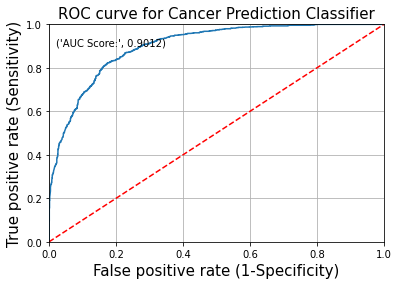

In [154]:
plot_roc(rf_model,test_data=X_test)

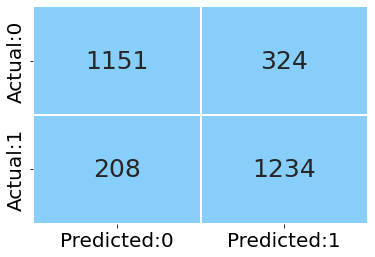

In [155]:
plot_confusion_matrix(rf_model, test_data=X_test)

Interpretation: The accuracy of the test dataset increased from 0.81 to 0.82 after tuning of the hyperparameters. Also, the sensitivity and specificity of the model are balanced.

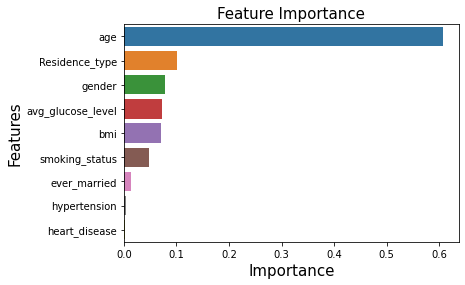

In [156]:
important_features = pd.DataFrame({'Features': X_train.columns, 
                                   'Importance': rf_model.feature_importances_})
important_features = important_features.sort_values('Importance', ascending = False)
sns.barplot(x = 'Importance', y = 'Features', data = important_features)
plt.title('Feature Importance', fontsize = 15)
plt.xlabel('Importance', fontsize = 15)
plt.ylabel('Features', fontsize = 15)
plt.show()

### Ada Boost 

In [133]:
ada_model = AdaBoostClassifier(n_estimators = 40, random_state = 10)
ada_model.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=40, random_state=10)

In [134]:
test_report = get_test_report(ada_model,test_data = X_test)
print(test_report)

              precision    recall  f1-score   support

           0       0.85      0.80      0.83      1475
           1       0.81      0.86      0.83      1442

    accuracy                           0.83      2917
   macro avg       0.83      0.83      0.83      2917
weighted avg       0.83      0.83      0.83      2917



Interpretation: The output shows that the model is 83% accurate.

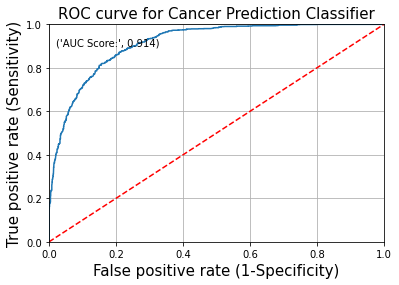

In [135]:
plot_roc(ada_model,test_data=X_test)

### Gradient Boosting Classification

In [136]:
gboost_model = GradientBoostingClassifier(n_estimators = 150, max_depth = 10, random_state = 10)
gboost_model.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=10, n_estimators=150, random_state=10)

In [137]:
test_report = get_test_report(gboost_model,test_data = X_test)
print(test_report)

              precision    recall  f1-score   support

           0       0.95      0.96      0.95      1475
           1       0.95      0.95      0.95      1442

    accuracy                           0.95      2917
   macro avg       0.95      0.95      0.95      2917
weighted avg       0.95      0.95      0.95      2917



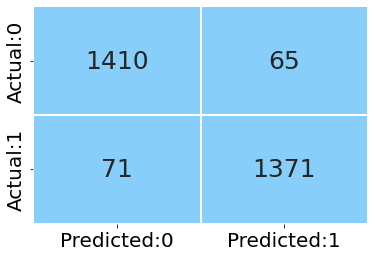

In [138]:
plot_confusion_matrix(gboost_model, test_data=X_test)

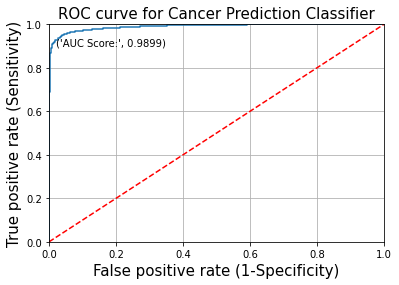

In [139]:
plot_roc(gboost_model,test_data = X_test)

### XGB Classification

In [140]:
xgb_model = XGBClassifier(max_depth = 10, gamma = 1)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=1, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [141]:
test_report = get_test_report(xgb_model,test_data = X_test)
print(test_report)

              precision    recall  f1-score   support

           0       0.95      0.94      0.95      1475
           1       0.94      0.95      0.95      1442

    accuracy                           0.95      2917
   macro avg       0.95      0.95      0.95      2917
weighted avg       0.95      0.95      0.95      2917



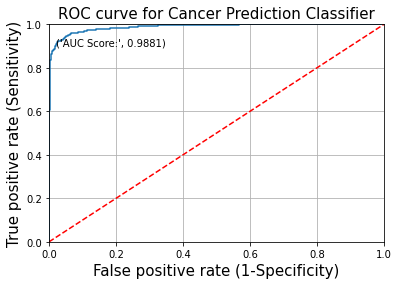

In [142]:
plot_roc(xgb_model,test_data = X_test)

### XGB Classification Grid Search CV

In [143]:
tuning_parameters = {'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6],
                     'max_depth': range(3,10),
                     'gamma': [0, 1, 2, 3, 4]}
xgb_model = XGBClassifier()
xgb_grid = GridSearchCV(estimator = xgb_model, param_grid = tuning_parameters, cv = 3, scoring = 'roc_auc')
xgb_grid.fit(X_train, y_train)
print('Best parameters for XGBoost classifier: ', xgb_grid.best_params_, '\n')

Best parameters for XGBoost classifier:  {'gamma': 0, 'learning_rate': 0.5, 'max_depth': 6} 



In [144]:
xgb_grid_model = XGBClassifier(learning_rate = xgb_grid.best_params_.get('learning_rate'),
                               max_depth = xgb_grid.best_params_.get('max_depth'),
                              gamma = xgb_grid.best_params_.get('gamma'))
xgb_model = xgb_grid_model.fit(X_train, y_train)
print('Classification Report for test set:\n', get_test_report(xgb_model,test_data = X_test))

Classification Report for test set:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95      1475
           1       0.95      0.95      0.95      1442

    accuracy                           0.95      2917
   macro avg       0.95      0.95      0.95      2917
weighted avg       0.95      0.95      0.95      2917



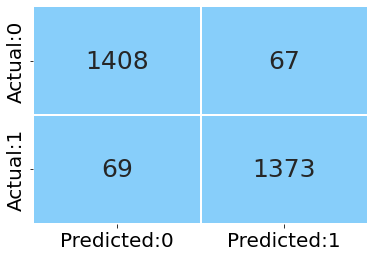

In [151]:
plot_confusion_matrix(xgb_grid_model, test_data=X_test)

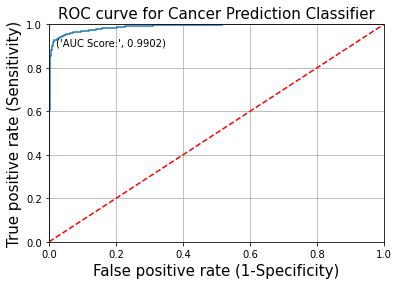

In [145]:
plot_roc(xgb_model,test_data = X_test)

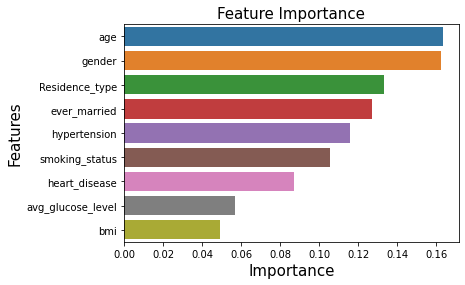

In [146]:
important_features = pd.DataFrame({'Features': X_train.columns, 
                                   'Importance': xgb_model.feature_importances_})
important_features = important_features.sort_values('Importance', ascending = False)
sns.barplot(x = 'Importance', y = 'Features', data = important_features)
plt.title('Feature Importance', fontsize = 15)
plt.xlabel('Importance', fontsize = 15)
plt.ylabel('Features', fontsize = 15)
plt.show()

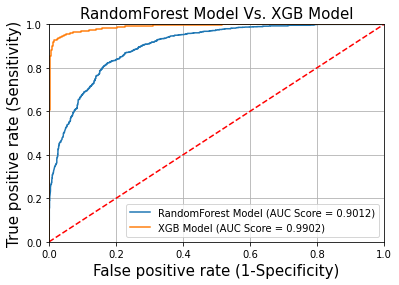

In [157]:
y_pred_prob_rf = rf_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_rf)
auc_score_rf = roc_auc_score(y_test, y_pred_prob_rf)
plt.plot(fpr, tpr, label='RandomForest Model (AUC Score = %0.4f)' % auc_score_rf)
y_pred_prob_xgb = xgb_grid_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_xgb)
auc_score_xgb = roc_auc_score(y_test, y_pred_prob_xgb)
plt.plot(fpr, tpr, label='XGB Model (AUC Score = %0.4f)' % auc_score_xgb)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1],'r--')
plt.title('RandomForest Model Vs. XGB Model', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
plt.legend(loc = 'lower right')
plt.grid(True)

### Stacking Classification 

In [147]:
# consider the various algorithms as base learners
base_learners = [('rf_model', RandomForestClassifier(criterion = 'entropy', max_depth = 10, max_features = 'sqrt', 
                                                     max_leaf_nodes = 8, min_samples_leaf = 5, min_samples_split = 2, 
                                                     n_estimators = 50, random_state = 10)),
                 ('KNN_model', KNeighborsClassifier(n_neighbors = 17, metric = 'euclidean')),
                 ('NB_model', GaussianNB())]

# initialize stacking classifier 
# pass the base learners to the parameter, 'estimators'
# pass the Naive Bayes model as the 'final_estimator'/ meta model
stack_model = StackingClassifier(estimators = base_learners, final_estimator = GaussianNB())

# fit the model on train dataset
stack_model.fit(X_train, y_train)

StackingClassifier(estimators=[('rf_model',
                                RandomForestClassifier(criterion='entropy',
                                                       max_depth=10,
                                                       max_leaf_nodes=8,
                                                       min_samples_leaf=5,
                                                       n_estimators=50,
                                                       random_state=10)),
                               ('KNN_model',
                                KNeighborsClassifier(metric='euclidean',
                                                     n_neighbors=17)),
                               ('NB_model', GaussianNB())],
                   final_estimator=GaussianNB())

In [148]:
test_report = get_test_report(stack_model,test_data = X_test)
print(test_report)

              precision    recall  f1-score   support

           0       0.90      0.80      0.85      1475
           1       0.82      0.91      0.86      1442

    accuracy                           0.85      2917
   macro avg       0.86      0.86      0.85      2917
weighted avg       0.86      0.85      0.85      2917



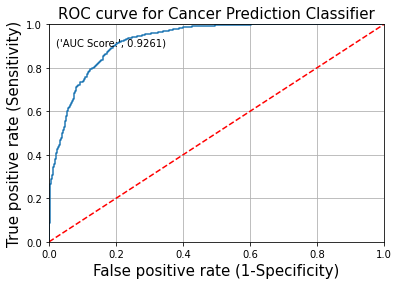

In [149]:
plot_roc(stack_model,test_data = X_test)

### Gradient Boosting Classification is perfoming well compared to other models. it have the acccuacy of 96%. Also, the sensitivity and specificity of the model are balanced.